In [3]:
import numpy as np
import pandas as pd
import os
for dirname, -, filenames in os.walk('/kaggle/input'):
    for filename in filenames :
        print(os.path.join(dirname, filename))

SyntaxError: invalid syntax (3020345400.py, line 4)

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv').drop(columns = 'subject')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [5]:
df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [6]:
print(df.shape)

(7352, 562)


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop('Activity', axis =1)
y = df['Activity']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
print(X_train.shape)
print(X_test.shape)

(5881, 561)
(1471, 561)


Applying Logistic Regression

In [9]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy', accuracy)

Test accuracy 0.9809653297076818


1.Removing Duplicate columns

In [10]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}
    
    for column in df.columns:
        current_column = df[column]
        
        # convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()
        
        if current_column_hash in seen_columns :
            if seen_columns[current_column_hash] in duplicate_columns :
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column
            
    return duplicate_columns
                

In [11]:
duplicate_columns = get_duplicate_columns(X_train)

In [12]:
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [13]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
57,-0.997420,-0.997420,-0.997420,-0.997420
4154,-0.133797,-0.133797,-0.133797,-0.133797
6945,0.130528,0.130528,0.130528,0.130528
527,-0.955222,-0.955222,-0.955222,-0.955222
4196,-0.992499,-0.992499,-0.992499,-0.992499
...,...,...,...,...
5191,-0.372758,-0.372758,-0.372758,-0.372758
5226,-0.256033,-0.256033,-0.256033,-0.256033
5390,-0.434138,-0.434138,-0.434138,-0.434138
860,-0.983969,-0.983969,-0.983969,-0.983969


In [14]:
for one_list in duplicate_columns.values():
    X_train.drop(columns = one_list, inplace=True)
    X_test.drop(columns = one_list, inplace = True)

2.Variance Threshold

In [15]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.05)

In [16]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [17]:
sum(sel.get_support())

349

In [18]:
columns = X_train.columns[sel.get_support()]

In [19]:
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=349)

In [20]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)

In [21]:
print(X_train.shape)
print(X_test.shape)

(5881, 349)
(1471, 349)


In [22]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.994939,-0.993994,-0.995450,-0.938974,-0.577031,-0.813863,0.846922,...,0.394506,-0.684497,-0.901888,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.343326,0.039623,-0.256327,-0.310961,0.085617,-0.411806,0.271334,...,0.052089,-0.131946,-0.591721,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,-0.118256,-0.030279,0.432861,0.370607,-0.072309,0.200747,0.118277,...,-0.038923,-0.643660,-0.935668,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.984417,-0.901405,-0.965788,-0.922291,-0.524676,-0.807362,0.825370,...,-0.145084,-0.326860,-0.645937,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.997331,-0.985196,-0.983768,-0.942062,-0.564033,-0.810993,0.853330,...,0.096524,-0.113724,-0.445144,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577


3. correlation

In [23]:
import seaborn as sns

<AxesSubplot:>

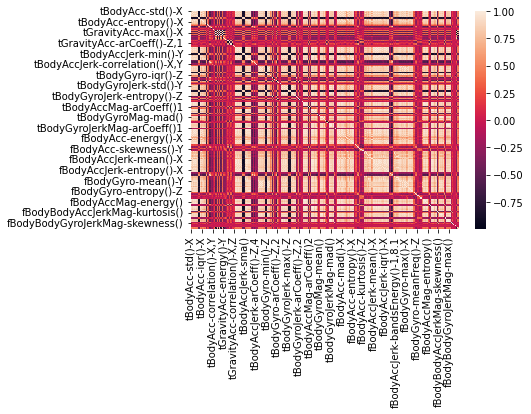

In [24]:
sns.heatmap(X_train.corr())

In [26]:
corr_matrix = X_train.corr()

In [27]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Loop over the columns 
for i in range(len(columns)):
    for j in range(i +1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95 :
            columns_to_drop.append(columns[j])
print(len(columns_to_drop))

1508


In [28]:
columns_to_drop = set(columns_to_drop)

In [29]:
len(columns_to_drop)

197

In [30]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace = True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace = True)

In [31]:
print(X_train.shape)
print(X_test.shape)

(5881, 152)
(1471, 152)


In [32]:
X_train

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyBodyGyroMag-skewness(),fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,0.043182,0.394506,-0.684497,0.751089,0.626432,0.263401,-0.646225,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,-0.225796,0.052089,-0.131946,0.628099,-0.357089,-0.925512,0.110212,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.346388,-0.038923,-0.643660,-0.182993,0.484857,-0.961034,0.147325,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,0.197311,-0.145084,-0.326860,0.205896,-0.168239,-0.197557,0.328892,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.310607,0.096524,-0.113724,-0.267371,-0.304399,-0.081555,0.110146,-0.615329,0.322236,0.161577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.555352,-0.104055,-0.438064,-0.373579,0.454289,0.153427,0.475699,0.455070,0.288106,0.191017,...,-0.490616,0.022624,0.417731,-0.155279,-0.137981,0.929236,-0.583898,-0.703989,0.159112,-0.185944
5877,-0.290043,-0.212102,-0.469731,-0.123285,0.123907,0.202561,0.577615,0.345742,0.159941,0.085557,...,-0.846175,-0.039773,-0.021970,-0.019533,-0.896005,-0.039591,0.494178,-0.670139,0.106156,-0.220746
5878,-0.627198,-0.216566,-0.424764,-0.441355,0.530629,0.077330,0.469639,0.436434,0.322259,0.086872,...,-0.609038,0.094031,0.527152,-0.414621,-0.488542,0.095895,-0.297162,-0.856512,0.183547,-0.034939
5879,-0.994825,-0.985314,-0.965857,-0.805684,0.849776,0.688222,0.828575,-0.542681,-0.667647,-0.431412,...,-0.327943,0.539885,-0.889671,-0.079515,0.014291,-0.290347,0.602344,-0.839693,0.081388,-0.098270


4.ANOVA

In [34]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(f_classif, k = 100).fit(X_train, y_train)

# display Selected feature names 
X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [35]:
columns = X_train.columns[sel.get_support()]

In [36]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)

In [37]:
print(X_train.shape)
print(X_test.shape)

(5881, 100)
(1471, 100)


In [38]:
X_train.head()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,...,fBodyGyro-meanFreq()-Z,"fBodyGyro-bandsEnergy()-1,8.1",fBodyAccMag-maxInds,fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyGyroMag-meanFreq(),"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,-0.994425,-0.994873,-0.994886,-0.813863,0.846922,0.691468,0.846423,-0.611174,-0.768785,-0.663066,...,-0.158283,-0.999962,0.172414,-0.986305,0.132640,-0.690000,-0.024257,0.398881,-0.546717,-0.431200
1,-0.326331,0.069663,-0.224321,-0.411806,0.271334,0.039452,0.269204,0.403663,0.180054,0.176069,...,-0.315738,-0.898022,-0.517241,-0.718822,0.144767,-0.316666,0.191186,-0.474013,0.383162,0.238969
2,-0.026220,-0.032163,0.393109,0.200747,0.118277,0.072295,0.245986,0.318557,0.135103,0.087680,...,-0.071045,0.192158,-0.793103,-0.290424,-0.088077,-0.270995,-0.431985,-0.819001,0.221549,-0.003571
3,-0.981092,-0.901124,-0.960423,-0.807362,0.825370,0.642789,0.815368,-0.376515,-0.171730,-0.496816,...,-0.629423,-0.996263,-0.931034,-0.997886,-0.027783,-0.651181,-0.567748,-0.744428,0.274256,0.031246
4,-0.997380,-0.983893,-0.984482,-0.810993,0.853330,0.687431,0.844895,-0.652548,-0.678458,-0.486837,...,0.261846,-0.999927,-1.000000,-0.988139,0.668020,-0.598248,-0.257360,-0.615329,0.322236,0.161577


Moment of Truth

In [39]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter= 1000)
log_reg.fit(X_train, y_train)
# make prediction on the test set 
y_pred = log_reg.predict(X_test)
# calculate and print accuracy score
accuracy = accuracy_score(y_test,y_pred)
print("Test accuracy", accuracy)

Test accuracy 0.9687287559483345


5.chi - square Test

In [47]:
titanic = pd.read_csv('train.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]

KeyError: "None of [Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived'], dtype='object')] are in the [columns]"

In [48]:
ct = pd.crosstab(titanic['Survived'],titanic['Sex'],margins = True)
ct

KeyError: 'Survived'

In [49]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

NameError: name 'ct' is not defined

In [50]:
score = []

for feature in titanic.columns[:-1]:
    
    # create contingency table
    ct = pd.crosstab(titanic['Survived'], titanic[feature])
    
    # chi_test
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)


KeyError: 'Survived'

In [51]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

ValueError: Length of values (0) does not match length of index (562)

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()

KeyError: "['Survived'] not found in axis"